In [1]:
%cd ../
%matplotlib inline

/home/work/AnacondaProjects/HTFATorch


In [2]:
import logging
import htfa_torch.htfa as HTFA
import htfa_torch.utils as utils

In [3]:
import glob

data_files = glob.glob('data/pieman_data/*.nii')

In [4]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(data_files, num_factors=15)

In [5]:
losses = htfa.train(num_steps=1000, learning_rate=1e-1, log_level=logging.INFO, num_particles=2)

03/21/2018 17:07:38 [Epoch 1] (331ms) Posterior free-energy 4.27196954e+09
03/21/2018 17:07:38 [Epoch 2] (246ms) Posterior free-energy 4.24951373e+09
03/21/2018 17:07:38 [Epoch 3] (241ms) Posterior free-energy 4.25331405e+09
03/21/2018 17:07:38 [Epoch 4] (245ms) Posterior free-energy 4.24840602e+09
03/21/2018 17:07:39 [Epoch 5] (244ms) Posterior free-energy 4.27209421e+09
03/21/2018 17:07:39 [Epoch 6] (242ms) Posterior free-energy 4.24176077e+09
03/21/2018 17:07:39 [Epoch 7] (242ms) Posterior free-energy 4.27855923e+09
03/21/2018 17:07:39 [Epoch 8] (243ms) Posterior free-energy 4.24323968e+09
03/21/2018 17:07:40 [Epoch 9] (241ms) Posterior free-energy 4.65983181e+09
03/21/2018 17:07:40 [Epoch 10] (244ms) Posterior free-energy 4.24298752e+09
03/21/2018 17:07:40 [Epoch 11] (242ms) Posterior free-energy 4.24191411e+09
03/21/2018 17:07:40 [Epoch 12] (242ms) Posterior free-energy 4.91488563e+09
03/21/2018 17:07:41 [Epoch 13] (247ms) Posterior free-energy 4.24879974e+09
03/21/2018 17:07:41 [

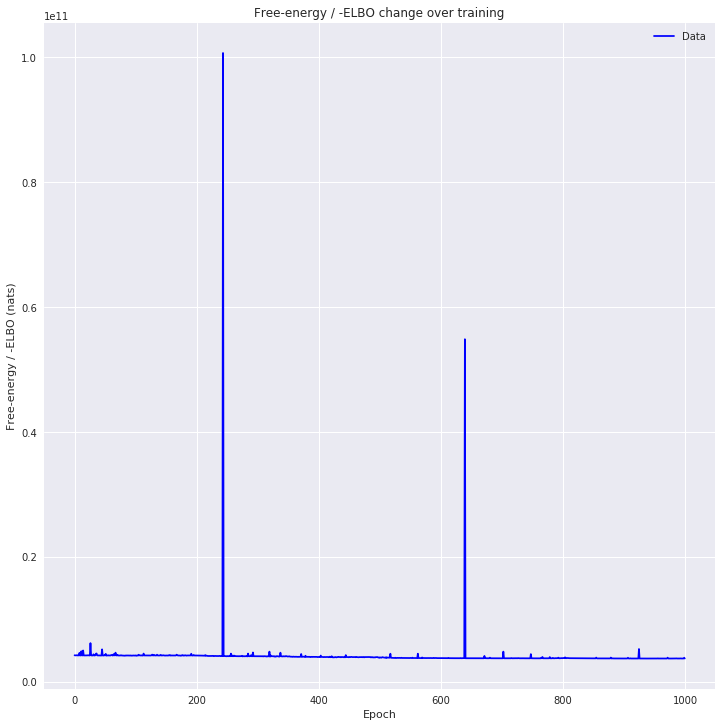

In [6]:
utils.plot_losses(losses)

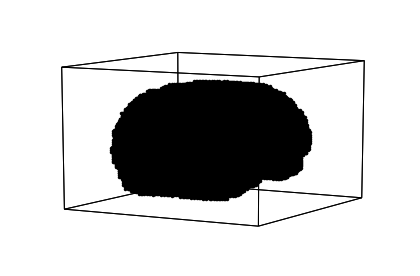

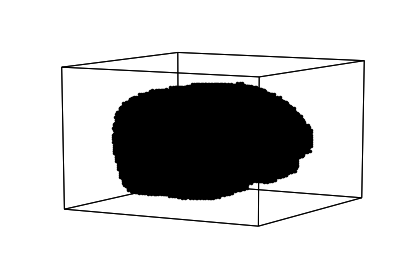

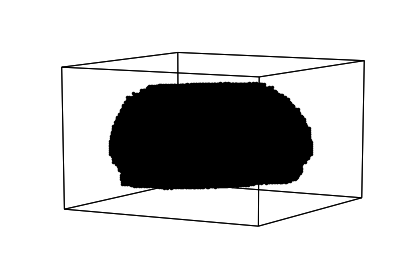

In [7]:
htfa.plot_voxels()

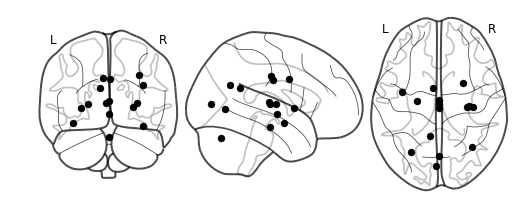

In [8]:
htfa.plot_factor_centers()

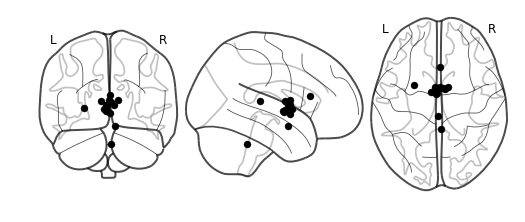

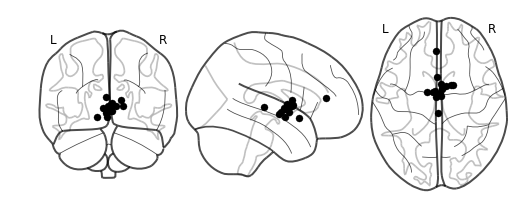

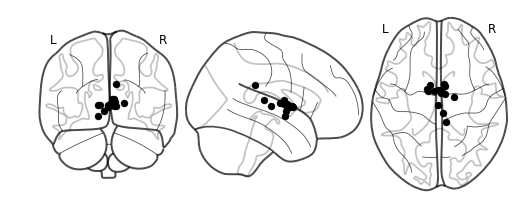

In [9]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(s)